In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from glob import glob

BASE_DIR = "./"

In [2]:
# Canary insertion

In [3]:
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp", "*")):
    df_nodps.append(pd.read_csv(p))
df_nodp_original = pd.read_csv('./nodp_10insertion_6digits_with_privacy.csv')
df_nodp_epoch1_bs32 = pd.read_csv('./nodp_10insertion_epoch1_bs32_with_privacy.csv').iloc[1:]
df_nodp_epoch1_bs16 = pd.read_csv('./nodp_10insertion_epoch1_bs16_with_privacy.csv').iloc[1:]
df_nodp = df_nodp_original.append(df_nodp_epoch1_bs32).append(df_nodp_epoch1_bs16).sort_values(by=['epoch', 'model_ppl'], ascending=[True, False]).drop_duplicates()

#dp
df_dp = pd.read_csv('./dp_sigma05_lr01_norm002_with_privacy.csv')
# dp norm=0.1, lr=0.05
df_dp_norm01_lr005 = pd.read_csv('./dp_sigma05_lr01_norm01_with_privacy.csv')
df_dp_norm01_lr01_sigma025 = pd.read_csv('./dp_sigma025_lr01_norm01_with_privacy.csv')

#partial dp
df_partial = pd.read_csv('./partial_dp_sigma05_lr01_norm002_with_privacy.csv')
df_partial_epoch1 = pd.read_csv('./partial_dp_sigma05_lr01_norm002_epoch1_save_every_batch_with_privacy.csv').iloc[1:]
df_partial = df_partial.append(df_partial_epoch1).sort_values(by=['epoch', 'model_ppl'], ascending=[True, False]).drop_duplicates()
df_partial_025 = pd.read_csv('./partial_dp_sigma025_lr01_norm01_with_privacy.csv')
df_partial_norm001 = pd.read_csv('./partial_dp_sigma05_lr01_norm001.csv')


In [187]:
df_partial_025.iloc[-1]



epoch                                                              50
model_ppl                                                   345.74889
model_acc                                                     0.25714
canary_exposure                                              0.306753
canary_rank                                                    808459
canary_ppl                                               21320.460668
TOTAL_CANDIDATES                                              1000000
model_path_x        model/partialdp/20210410/093833/data-wikitext-...
epsilon                                                        261.87
delta                                                         0.00008
alpha                                                             1.1
model_path_y        model/partialdp/20210410/093833/data-wikitext-...
Name: 50, dtype: object

In [186]:
df_dp_norm01_lr01_sigma025.iloc[-1]

epoch                                                              50
model_ppl                                                  305.337453
model_acc                                                     0.28571
canary_exposure                                              1.706291
canary_rank                                                    306447
canary_ppl                                               15755.440897
TOTAL_CANDIDATES                                              1000000
model_path_x        model/dp/20210411/123315/data-wikitext-2-add10...
epsilon                                                        132.73
delta                                                         0.00008
alpha                                                             1.2
model_path_y        model/dp/20210411/123315/data-wikitext-2-add10...
Name: 50, dtype: object

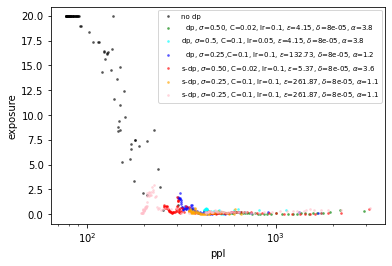

In [4]:
plot_func = plt.scatter
dot_size=3
alpha = 0.5


plot_func(df_nodp['model_ppl'].tolist()[1:], df_nodp['canary_exposure'].tolist()[1:], color='black', s=dot_size, alpha=alpha, label='no dp')


plot_func(df_dp['model_ppl'].tolist()[1:], df_dp['canary_exposure'].tolist()[1:], color='green', s=dot_size, alpha=alpha, label=f"  dp, $\sigma$=0.50, C=0.02, lr=0.1, $\epsilon$={df_dp.iloc[-1]['epsilon']}, $\delta$={df_dp.iloc[-1]['delta']}, $\\alpha$={df_dp.iloc[-1]['alpha']}")
plot_func(df_dp_norm01_lr005['model_ppl'].tolist()[1:], df_dp_norm01_lr005['canary_exposure'].tolist()[1:], color='cyan', s=dot_size, alpha=alpha, label=f"dp, $\sigma$=0.5, C=0.1, lr=0.05, $\epsilon$={df_dp_norm01_lr005.iloc[-1]['epsilon']}, $\delta$={df_dp_norm01_lr005.iloc[-1]['delta']}, $\\alpha$={df_dp_norm01_lr005.iloc[-1]['alpha']}")
plot_func(df_dp_norm01_lr01_sigma025['model_ppl'].tolist()[1:], df_dp_norm01_lr01_sigma025['canary_exposure'].tolist()[1:], color='blue', s=dot_size, alpha=alpha, label=f"  dp, $\sigma$=0.25,C=0.1, lr=0.1, $\epsilon$={df_dp_norm01_lr01_sigma025.iloc[-1]['epsilon']}, $\delta$={df_dp_norm01_lr01_sigma025.iloc[-1]['delta']}, $\\alpha$={df_dp_norm01_lr01_sigma025.iloc[-1]['alpha']}")


plot_func(df_partial['model_ppl'].tolist()[1:], df_partial['canary_exposure'].tolist()[1:], color='red', s=dot_size, alpha=alpha, label=f"s-dp, $\sigma$=0.50, C=0.02, lr=0.1, $\epsilon$={df_partial.iloc[-1]['epsilon']}, $\delta$={df_partial.iloc[-1]['delta']}, $\\alpha$={df_partial.iloc[-1]['alpha']}")
plot_func(df_partial_025['model_ppl'].tolist()[1:], df_partial_025['canary_exposure'].tolist()[1:], color='orange', s=dot_size, alpha=alpha, label=f"s-dp, $\sigma$=0.25, C=0.1, lr=0.1, $\epsilon$={df_partial_025.iloc[-1]['epsilon']}, $\delta$={df_partial_025.iloc[-1]['delta']}, $\\alpha$={df_partial_025.iloc[-1]['alpha']}")
plot_func(df_partial_norm001['model_ppl'].tolist()[1:], df_partial_norm001['canary_exposure'].tolist()[1:], color='pink', s=dot_size, alpha=alpha, label=f"s-dp, $\sigma$=0.25, C=0.1, lr=0.1, $\epsilon$={df_partial_025.iloc[-1]['epsilon']}, $\delta$={df_partial_025.iloc[-1]['delta']}, $\\alpha$={df_partial_025.iloc[-1]['alpha']}")
# plt.scatter(df_partial_025['model_ppl'].tolist()[1:], df_partial_025['canary_exposure'].tolist()[1:], color='green')
plt.legend(loc="upper right", prop={'size':7})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('exposure')
plt.show()

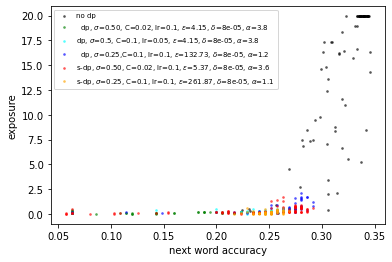

In [145]:
plot_func = plt.scatter
dot_size=3
alpha = 0.5


plot_func(df_nodp['model_acc'].tolist()[1:], df_nodp['canary_exposure'].tolist()[1:], color='black', s=dot_size, alpha=alpha, label='no dp')


plot_func(df_dp['model_acc'].tolist()[1:], df_dp['canary_exposure'].tolist()[1:], color='green', s=dot_size, alpha=alpha, label=f"  dp, $\sigma$=0.50, C=0.02, lr=0.1, $\epsilon$={df_dp.iloc[-1]['epsilon']}, $\delta$={df_dp.iloc[-1]['delta']}, $\\alpha$={df_dp.iloc[-1]['alpha']}")
plot_func(df_dp_norm01_lr005['model_acc'].tolist()[1:], df_dp_norm01_lr005['canary_exposure'].tolist()[1:], color='cyan', s=dot_size, alpha=alpha, label=f"dp, $\sigma$=0.5, C=0.1, lr=0.05, $\epsilon$={df_dp_norm01_lr005.iloc[-1]['epsilon']}, $\delta$={df_dp_norm01_lr005.iloc[-1]['delta']}, $\\alpha$={df_dp_norm01_lr005.iloc[-1]['alpha']}")
plot_func(df_dp_norm01_lr01_sigma025['model_acc'].tolist()[1:], df_dp_norm01_lr01_sigma025['canary_exposure'].tolist()[1:], color='blue', s=dot_size, alpha=alpha, label=f"  dp, $\sigma$=0.25,C=0.1, lr=0.1, $\epsilon$={df_dp_norm01_lr01_sigma025.iloc[-1]['epsilon']}, $\delta$={df_dp_norm01_lr01_sigma025.iloc[-1]['delta']}, $\\alpha$={df_dp_norm01_lr01_sigma025.iloc[-1]['alpha']}")


plot_func(df_partial['model_acc'].tolist()[1:], df_partial['canary_exposure'].tolist()[1:], color='red', s=dot_size, alpha=alpha, label=f"s-dp, $\sigma$=0.50, C=0.02, lr=0.1, $\epsilon$={df_partial.iloc[-1]['epsilon']}, $\delta$={df_partial.iloc[-1]['delta']}, $\\alpha$={df_partial.iloc[-1]['alpha']}")
plot_func(df_partial_025['model_acc'].tolist()[1:], df_partial_025['canary_exposure'].tolist()[1:], color='orange', s=dot_size, alpha=alpha, label=f"s-dp, $\sigma$=0.25, C=0.1, lr=0.1, $\epsilon$={df_partial_025.iloc[-1]['epsilon']}, $\delta$={df_partial_025.iloc[-1]['delta']}, $\\alpha$={df_partial_025.iloc[-1]['alpha']}")
# plt.scatter(df_partial_025['model_acc'].tolist()[1:], df_partial_025['canary_exposure'].tolist()[1:], color='green')
plt.legend(loc="upper left", prop={'size':7})
plt.xlabel('next word accuracy')
plt.ylabel('exposure')
plt.show()

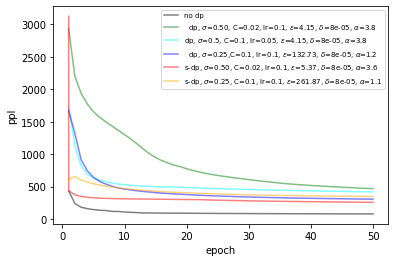

In [147]:
plot_func = plt.plot
dot_size=3
alpha = 0.5


plot_func(df_nodp_original['epoch'].tolist()[1:], df_nodp_original['model_ppl'].tolist()[1:], color='black',  alpha=alpha, label='no dp')


plot_func(df_dp['epoch'].tolist()[1:], df_dp['model_ppl'].tolist()[1:], color='green',  alpha=alpha, label=f"  dp, $\sigma$=0.50, C=0.02, lr=0.1, $\epsilon$={df_dp.iloc[-1]['epsilon']}, $\delta$={df_dp.iloc[-1]['delta']}, $\\alpha$={df_dp.iloc[-1]['alpha']}")
plot_func(df_dp_norm01_lr005['epoch'].tolist()[1:], df_dp_norm01_lr005['model_ppl'].tolist()[1:], color='cyan', alpha=alpha, label=f"dp, $\sigma$=0.5, C=0.1, lr=0.05, $\epsilon$={df_dp_norm01_lr005.iloc[-1]['epsilon']}, $\delta$={df_dp_norm01_lr005.iloc[-1]['delta']}, $\\alpha$={df_dp_norm01_lr005.iloc[-1]['alpha']}")
plot_func(df_dp_norm01_lr01_sigma025['epoch'].tolist()[1:], df_dp_norm01_lr01_sigma025['model_ppl'].tolist()[1:], color='blue',  alpha=alpha, label=f"  dp, $\sigma$=0.25,C=0.1, lr=0.1, $\epsilon$={df_dp_norm01_lr01_sigma025.iloc[-1]['epsilon']}, $\delta$={df_dp_norm01_lr01_sigma025.iloc[-1]['delta']}, $\\alpha$={df_dp_norm01_lr01_sigma025.iloc[-1]['alpha']}")


plot_func(df_partial['epoch'].tolist()[1:], df_partial['model_ppl'].tolist()[1:], color='red',  alpha=alpha, label=f"s-dp, $\sigma$=0.50, C=0.02, lr=0.1, $\epsilon$={df_partial.iloc[-1]['epsilon']}, $\delta$={df_partial.iloc[-1]['delta']}, $\\alpha$={df_partial.iloc[-1]['alpha']}")
plot_func(df_partial_025['epoch'].tolist()[1:], df_partial_025['model_ppl'].tolist()[1:], color='orange',  alpha=alpha, label=f"s-dp, $\sigma$=0.25, C=0.1, lr=0.1, $\epsilon$={df_partial_025.iloc[-1]['epsilon']}, $\delta$={df_partial_025.iloc[-1]['delta']}, $\\alpha$={df_partial_025.iloc[-1]['alpha']}")
# plt.scatter(df_partial_025['epoch'].tolist()[1:], df_partial_025['model_ppl'].tolist()[1:], color='green')
plt.legend(loc="upper right", prop={'size':7})
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('epoch')
plt.ylabel('ppl')
plt.show()

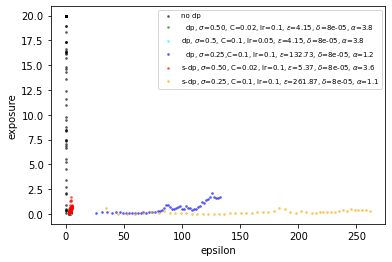

In [150]:
plot_func = plt.scatter
dot_size=3
alpha = 0.5


plot_func(df_nodp['epsilon'].tolist()[1:], df_nodp['canary_exposure'].tolist()[1:], color='black', s=dot_size, alpha=alpha, label='no dp')


plot_func(df_dp['epsilon'].tolist()[1:], df_dp['canary_exposure'].tolist()[1:], color='green', s=dot_size, alpha=alpha, label=f"  dp, $\sigma$=0.50, C=0.02, lr=0.1, $\epsilon$={df_dp.iloc[-1]['epsilon']}, $\delta$={df_dp.iloc[-1]['delta']}, $\\alpha$={df_dp.iloc[-1]['alpha']}")
plot_func(df_dp_norm01_lr005['epsilon'].tolist()[1:], df_dp_norm01_lr005['canary_exposure'].tolist()[1:], color='cyan', s=dot_size, alpha=alpha, label=f"dp, $\sigma$=0.5, C=0.1, lr=0.05, $\epsilon$={df_dp_norm01_lr005.iloc[-1]['epsilon']}, $\delta$={df_dp_norm01_lr005.iloc[-1]['delta']}, $\\alpha$={df_dp_norm01_lr005.iloc[-1]['alpha']}")
plot_func(df_dp_norm01_lr01_sigma025['epsilon'].tolist()[1:], df_dp_norm01_lr01_sigma025['canary_exposure'].tolist()[1:], color='blue', s=dot_size, alpha=alpha, label=f"  dp, $\sigma$=0.25,C=0.1, lr=0.1, $\epsilon$={df_dp_norm01_lr01_sigma025.iloc[-1]['epsilon']}, $\delta$={df_dp_norm01_lr01_sigma025.iloc[-1]['delta']}, $\\alpha$={df_dp_norm01_lr01_sigma025.iloc[-1]['alpha']}")


plot_func(df_partial['epsilon'].tolist()[1:], df_partial['canary_exposure'].tolist()[1:], color='red', s=dot_size, alpha=alpha, label=f"s-dp, $\sigma$=0.50, C=0.02, lr=0.1, $\epsilon$={df_partial.iloc[-1]['epsilon']}, $\delta$={df_partial.iloc[-1]['delta']}, $\\alpha$={df_partial.iloc[-1]['alpha']}")
plot_func(df_partial_025['epsilon'].tolist()[1:], df_partial_025['canary_exposure'].tolist()[1:], color='orange', s=dot_size, alpha=alpha, label=f"s-dp, $\sigma$=0.25, C=0.1, lr=0.1, $\epsilon$={df_partial_025.iloc[-1]['epsilon']}, $\delta$={df_partial_025.iloc[-1]['delta']}, $\\alpha$={df_partial_025.iloc[-1]['alpha']}")
# plt.scatter(df_partial_025['epsilon'].tolist()[1:], df_partial_025['canary_exposure'].tolist()[1:], color='green')
plt.legend(loc="upper right", prop={'size':7})
plt.xlabel('epsilon')
plt.ylabel('exposure')
plt.show()

In [188]:
# membership
#nodp
df_nodp_original_mem = pd.read_csv('../membership_inference/nodp_1000_with_privacy.csv')
# df_nodp_epoch1_bs32 = pd.read_csv('./nodp_10insertion_epoch1_bs32_with_privacy.csv').iloc[1:]
# df_nodp_epoch1_bs16 = pd.read_csv('./nodp_10insertion_epoch1_bs16_with_privacy.csv').iloc[1:]
# df_nodp = df_nodp_original.append(df_nodp_epoch1_bs32).append(df_nodp_epoch1_bs16).sort_values(by=['epoch', 'model_ppl'], ascending=[True, False]).drop_duplicates()


#dp
df_dp = pd.read_csv('../membership_inference/dp_lr05_sigma05_norm002_1000_with_privacy.csv')
# dp norm=0.1, lr=0.05
df_dp_norm01_lr005 = pd.read_csv('../membership_inference/dp_lr005_sigma05_norm01_1000_with_privacy.csv')
# df_dp_norm01_lr01_sigma025 = pd.read_csv('./dp_sigma025_lr01_norm01_with_privacy.csv')

#partial dp
df_partial = pd.read_csv('../membership_inference/partial_dp_lr01_sigma05_norm002_1000_epoch50_with_privacy.csv')
df_partial_epoch1 = pd.read_csv('../membership_inference/partial_dp_lr01_sigma05_norm002_1000_epoch1_save_every_batch_with_privacy.csv').iloc[1:]
df_partial = df_partial.append(df_partial_epoch1).sort_values(by=['epoch', 'model_ppl'], ascending=[True, False]).drop_duplicates()
df_partial_025 = pd.read_csv('../membership_inference/partialdp_lr01_sigma025_norm01_1000_with_privacy.csv')


In [190]:
df_nodp_original_mem.head()

,epoch,model_ppl,model_acc,inference_ppl_acc,inference_lower_ppl_acc,inference_gpt2_acc,inference_zlip_acc,TOTAL_CANDIDATES,model_path_x,epsilon,delta,alpha,model_path_y
0,0,50435.213332,0.00000,0.576,0.516,0.564,0.552,1000,model/nodp/20210409/185850/data-wikitext-2-add...,0,0,0,model/nodp/20210409/185850/data-wikitext-2-add...
1,1,432.096859,0.22400,0.330,0.512,0.550,0.324,1000,model/nodp/20210409/185850/data-wikitext-2-add...,0,0,0,model/nodp/20210409/185850/data-wikitext-2-add...
2,2,238.029466,0.26872,0.344,0.532,0.552,0.334,1000,model/nodp/20210409/185850/data-wikitext-2-add...,0,0,0,model/nodp/20210409/185850/data-wikitext-2-add...
3,3,180.329926,0.29176,0.340,0.538,0.552,0.340,1000,model/nodp/20210409/185850/data-wikitext-2-add...,0,0,0,model/nodp/20210409/185850/data-wikitext-2-add...
4,4,158.918479,0.29836,0.352,0.540,0.554,0.346,1000,model/nodp/20210409/185850/data-wikitext-2-add...,0,0,0,model/nodp/20210409/185850/data-wikitext-2-add...


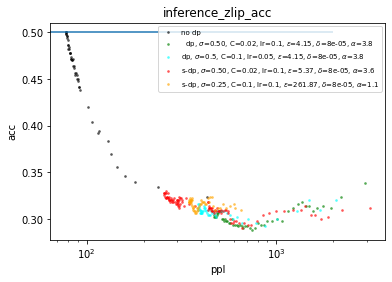

In [194]:
plot_func = plt.scatter
dot_size=3
alpha = 0.5
metrics = "inference_zlip_acc"#"inference_ppl_acc"


plt.title(metrics)
plot_func(df_nodp_original_mem['model_ppl'].tolist()[1:], df_nodp_original_mem[metrics].tolist()[1:], color='black', s=dot_size, alpha=alpha, label='no dp')


plot_func(df_dp['model_ppl'].tolist()[1:], df_dp[metrics].tolist()[1:], color='green', s=dot_size, alpha=alpha, label=f"  dp, $\sigma$=0.50, C=0.02, lr=0.1, $\epsilon$={df_dp.iloc[-1]['epsilon']}, $\delta$={df_dp.iloc[-1]['delta']}, $\\alpha$={df_dp.iloc[-1]['alpha']}")
plot_func(df_dp_norm01_lr005['model_ppl'].tolist()[1:], df_dp_norm01_lr005[metrics].tolist()[1:], color='cyan', s=dot_size, alpha=alpha, label=f"dp, $\sigma$=0.5, C=0.1, lr=0.05, $\epsilon$={df_dp_norm01_lr005.iloc[-1]['epsilon']}, $\delta$={df_dp_norm01_lr005.iloc[-1]['delta']}, $\\alpha$={df_dp_norm01_lr005.iloc[-1]['alpha']}")
# plot_func(df_dp_norm01_lr01_sigma025['model_ppl'].tolist()[1:], df_dp_norm01_lr01_sigma025['inference_ppl_acc'].tolist()[1:], color='blue', s=dot_size, alpha=alpha, label=f"  dp, $\sigma$=0.25,C=0.1, lr=0.1, $\epsilon$={df_dp_norm01_lr01_sigma025.iloc[-1]['epsilon']}, $\delta$={df_dp_norm01_lr01_sigma025.iloc[-1]['delta']}, $\\alpha$={df_dp_norm01_lr01_sigma025.iloc[-1]['alpha']}")


plot_func(df_partial['model_ppl'].tolist()[1:], df_partial[metrics].tolist()[1:], color='red', s=dot_size, alpha=alpha, label=f"s-dp, $\sigma$=0.50, C=0.02, lr=0.1, $\epsilon$={df_partial.iloc[-1]['epsilon']}, $\delta$={df_partial.iloc[-1]['delta']}, $\\alpha$={df_partial.iloc[-1]['alpha']}")
plot_func(df_partial_025['model_ppl'].tolist()[1:], df_partial_025[metrics].tolist()[1:], color='orange', s=dot_size, alpha=alpha, label=f"s-dp, $\sigma$=0.25, C=0.1, lr=0.1, $\epsilon$={df_partial_025.iloc[-1]['epsilon']}, $\delta$={df_partial_025.iloc[-1]['delta']}, $\\alpha$={df_partial_025.iloc[-1]['alpha']}")
# plt.scatter(df_partial_025['model_ppl'].tolist()[1:], df_partial_025['inference_ppl_acc'].tolist()[1:], color='green')

plt.hlines(0.5, xmin=0, xmax=2000)
plt.legend(loc="upper right", prop={'size':7})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('acc')
plt.show()